<a href="https://colab.research.google.com/github/Darpana-iitgn/ES335_pre_req/blob/main/ES335_pre_req_Darpana_23110085.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1.

To multiply a matrix of size nxk with a matrix of size kxm, resulting in a matrix of size nxm, we need to perform the following operations:

#### Number of Multiplications
For each element Cij in the resulting matrix C, we perform k multiplications (one for each element in the row of the first matrix and column of the second matrix).

- **Total number of multiplications**: n x m x k

#### Number of Additions
To compute each element Cij, we need to perform k - 1 additions to sum up k products.

- **Total number of additions**: n x m x (k - 1)

A2. Numpy is faster because NumPy operations are implemented in C and leverage optimized libraries, making them much faster for large-scale operations compared to Python's naive list of lists.

In [ ]:
import time
import numpy as np

# Function to multiply two matrices using list of lists
def matrix_multiply_list_of_lists(A, B):
    n = len(A)
    k = len(B)
    m = len(B[0])

    # Initialize result matrix with zeros
    C = [[0] * m for _ in range(n)]

    # Perform matrix multiplication
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]

    return C

# Define larger matrices
A = [[i + j for j in range(100)] for i in range(100)]  # 100x100 matrix
B = [[i + j for j in range(100)] for i in range(100)]  # 100x100 matrix

# Convert lists to NumPy arrays
start_time = time.time()
A_np = np.array(A)
B_np = np.array(B)

# Measure time for NumPy multiplication
start_time = time.time()
C_np = np.matmul(A_np, B_np)
numpy_time = time.time() - start_time

# Measure time for list of lists method
start_time = time.time()
C_list_of_lists = matrix_multiply_list_of_lists(A, B)
list_of_lists_time = time.time() - start_time


# Print results
print("Result using list of lists:")
print(C_list_of_lists)
print(f"Time taken with list of lists: {list_of_lists_time} seconds")

print("Result using NumPy:")
print(C_np)
print(f"Time taken with NumPy multiplication: {numpy_time} seconds")

Result using list of lists:
[[328350, 333300, 338250, 343200, 348150, 353100, 358050, 363000, 367950, 372900, 377850, 382800, 387750, 392700, 397650, 402600, 407550, 412500, 417450, 422400, 427350, 432300, 437250, 442200, 447150, 452100, 457050, 462000, 466950, 471900, 476850, 481800, 486750, 491700, 496650, 501600, 506550, 511500, 516450, 521400, 526350, 531300, 536250, 541200, 546150, 551100, 556050, 561000, 565950, 570900, 575850, 580800, 585750, 590700, 595650, 600600, 605550, 610500, 615450, 620400, 625350, 630300, 635250, 640200, 645150, 650100, 655050, 660000, 664950, 669900, 674850, 679800, 684750, 689700, 694650, 699600, 704550, 709500, 714450, 719400, 724350, 729300, 734250, 739200, 744150, 749100, 754050, 759000, 763950, 768900, 773850, 778800, 783750, 788700, 793650, 798600, 803550, 808500, 813450, 818400], [333300, 338350, 343400, 348450, 353500, 358550, 363600, 368650, 373700, 378750, 383800, 388850, 393900, 398950, 404000, 409050, 414100, 419150, 424200, 429250, 434300, 

A3. To find the median of an array, you typically need to sort the array, which has a time complexity of O(nlogn), where n is the number of elements in the array.
However, there are more efficient methods for finding the median without sorting, such as using the Quickselect algorithm.

Time Complexity Analysis

Finding the Median by Sorting:
Time Complexity:
O(nlogn), where n is the number of elements.
Reason: Sorting the array is required to find the median.

Finding the Median Using Quickselect:
Time Complexity:
O(n) on average, but can be O(n ^ 2) in the worst case.
Reason: Quickselect is an optimized selection algorithm that finds the k-th smallest element in linear time on average. Quickselect is theoretically efficient but might not always outperform sorting due to practical overheads.

In [ ]:
import numpy as np
import time
from random import randint

# Optimized Quickselect algorithm
def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]

    # Using a random pivot for better average-case performance
    pivot = arr[randint(0, len(arr) - 1)]
    lows, highs, pivots = [], [], []

    for el in arr:
        if el < pivot:
            lows.append(el)
        elif el > pivot:
            highs.append(el)
        else:
            pivots.append(el)

    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

def median_by_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, n // 2)
    else:
        left = quickselect(arr, n // 2 - 1)
        right = quickselect(arr, n // 2)
        return (left + right) / 2

# Generate a larger random array
np.random.seed(0)
arr = np.random.randint(0, 10000000, size=1000000)  # Larger array

# Measure time for median by sorting
start_time = time.time()
median_sorting = median_by_sorting(arr)
time_sorting = time.time() - start_time

# Measure time for median by Quickselect
start_time = time.time()
median_quickselect = median_by_quickselect(arr)
time_quickselect = time.time() - start_time

# Measure time for NumPy median
start_time = time.time()
median_numpy = np.median(arr)
time_numpy = time.time() - start_time

# Print results
print(f"Median by sorting: {median_sorting}, Time taken: {time_sorting:.4f} seconds")
print(f"Median by Quickselect: {median_quickselect}, Time taken: {time_quickselect:.4f} seconds")
print(f"Median by NumPy: {median_numpy}, Time taken: {time_numpy:.4f} seconds")

Median by sorting: 4997833.5, Time taken: 0.9735 seconds
Median by Quickselect: 4997833.5, Time taken: 1.1543 seconds
Median by NumPy: 4997833.5, Time taken: 0.0188 seconds


<p><strong>A4.</strong> To find the gradient of the function <i>f(x, y) = (x^2 y) + (y^2 sin x)</i> with respect to <i>x</i> and <i>y</i>, we need to compute the partial derivatives of the function with respect to each variable.</p>

<h3>Function</h3>
<p><i>f(x, y) = x^2 y + y^2 sin x</i></p>

<h3>Partial Derivative with Respect to <i>x</i></h3>
<p>To find <i>&#x2202;f / &#x2202;x</i>:</p>
<ol>
<li>Differentiating <i>x^2 y</i> with respect to <i>x</i>:<br>
   <i>&#x2202;/&#x2202;x (x^2 y) = 2xy</i></li>
<li>Differentiating <i>y^2 sin x</i> with respect to <i>x</i>:<br>
   <i>&#x2202;/&#x2202;x (y^2 sin x) = y^2 cos x</i></li>
</ol>
<p>Combine these results:<br>
<i>&#x2202;f / &#x2202;x = 2xy + y^2 cos x</i></p>

<h3>Partial Derivative with Respect to <i>y</i></h3>
<p>To find <i>&#x2202;f / &#x2202;y</i>:</p>
<ol>
<li>Differentiating <i>x^2 y</i> with respect to <i>y</i>:<br>
   <i>&#x2202;/&#x2202;y (x^2 y) = x^2</i></li>
<li>Differentiating <i>y^2 sin x</i> with respect to <i>y</i>:<br>
   <i>&#x2202;/&#x2202;y (y^2 sin x) = 2y sin x</i></li>
</ol>
<p>Combine these results:<br>
<i>&#x2202;f / &#x2202;y = x^2 + 2y sin x</i></p>

<h3>Gradient</h3>
<p>The gradient of the function <i>f(x, y)</i> is a vector of the partial derivatives:<br>
<i>&#x2207;f(x, y) = (&#x2202;f / &#x2202;x, &#x2202;f / &#x2202;y)</i></p>
<p>Thus:<br>
<i>&#x2207;f(x, y) = (2xy + y^2 cos x, x^2 + 2y sin x)</i></p>

In [ ]:
import jax
import jax.numpy as jnp
from jax import grad

# Define the function
def f(x, y):
    return (x**2 * y) + (y**2 * jnp.sin(x))

# Compute the gradient using JAX
grad_f = jax.jit(jax.grad(f, argnums=(0, 1)))  # Compute gradient with respect to both x and y

# Define a few random values for x and y
values = [(1.0, 2.0), (3.0, 4.0), (5.0, 6.0)]

# Calculate and print the analytical gradient and the JAX gradient
for x_val, y_val in values:
    # Analytical Gradient
    df_dx_analytical = 2 * x_val * y_val + y_val**2 * jnp.cos(x_val)
    df_dy_analytical = x_val**2 + 2 * y_val * jnp.sin(x_val)

    # JAX Gradient
    grad_x, grad_y = grad_f(x_val, y_val)

    print(f"At x = {x_val}, y = {y_val}:")
    print(f"Analytical Gradient: (df/dx = {df_dx_analytical}, df/dy = {df_dy_analytical})")
    print(f"JAX Gradient: (df/dx = {grad_x}, df/dy = {grad_y})")
    print("")

At x = 1.0, y = 2.0:
Analytical Gradient: (df/dx = 6.1612091064453125, df/dy = 4.365883827209473)
JAX Gradient: (df/dx = 6.1612091064453125, df/dy = 4.365883827209473)

At x = 3.0, y = 4.0:
Analytical Gradient: (df/dx = 8.160120010375977, df/dy = 10.128959655761719)
JAX Gradient: (df/dx = 8.160120010375977, df/dy = 10.128959655761719)

At x = 5.0, y = 6.0:
Analytical Gradient: (df/dx = 70.21183776855469, df/dy = 13.492908477783203)
JAX Gradient: (df/dx = 70.21183776855469, df/dy = 13.492908477783203)



In [ ]:
import sympy as sp

# Define the variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**2 * sp.sin(x)

# Compute partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Define a few random values for x and y
values = [(1.0, 2.0), (3.0, 4.0), (5.0, 6.0)]

# Calculate and print the analytical gradient
for x_val, y_val in values:
    # Substitute values into the gradient formulas
    df_dx_val = df_dx.subs({x: x_val, y: y_val})
    df_dy_val = df_dy.subs({x: x_val, y: y_val})

    print(f"At x = {x_val}, y = {y_val}:")
    print(f"SymPy Gradient: (df/dx = {df_dx_val}, df/dy = {df_dy_val})")
    print("")

At x = 1.0, y = 2.0:
SymPy Gradient: (df/dx = 6.16120922347256, df/dy = 4.36588393923159)

At x = 3.0, y = 4.0:
SymPy Gradient: (df/dx = 8.16012005439287, df/dy = 10.1289600644789)

At x = 5.0, y = 6.0:
SymPy Gradient: (df/dx = 70.2118386766761, df/dy = 13.4929087040423)



In [ ]:
import pprint

students_records = {
    2022: {
        'Branch 1': {
            1: {
                'Name': 'N',
                'Marks': {
                    'Maths': 100,
                    'English': 70,
                    'Science': 85
                }
            },
            2: {
                'Name': 'O',
                'Marks': {
                    'Maths': 78,
                    'English': 82,
                    'Science': 80
                }
            }
        },
        'Branch 2': {
            3: {
                'Name': 'P',
                'Marks': {
                    'Maths': 85,
                    'English': 90,
                    'Social Studies': 88
                }
            },
            4: {
                'Name': 'Q',
                'Marks': {
                    'Maths': 92,
                    'English': 85,
                    'Social Studies': 82
                }
            }
        }
    },
    2023: {
        'Branch 1': {
            1: {
                'Name': 'R',
                'Marks': {
                    'Maths': 88,
                    'English': 75,
                    'Science': 90
                }
            },
            2: {
                'Name': 'S',
                'Marks': {
                    'Maths': 80,
                    'English': 70,
                    'Science': 85
                }
            }
        },
        'Branch 2': {
            3: {
                'Name': 'T',
                'Marks': {
                    'Maths': 78,
                    'English': 80,
                    'Social Studies': 83
                }
            },
            4: {
                'Name': 'U',
                'Marks': {
                    'Maths': 85,
                    'English': 88,
                    'Social Studies': 86
                }
            }
        }
    },
    2024: {
        'Branch 1': {
            1: {
                'Name': 'V',
                'Marks': {
                    'Maths': 90,
                    'English': 85,
                    'Science': 92
                }
            },
            2: {
                'Name': 'W',
                'Marks': {
                    'Maths': 80,
                    'English': 75,
                    'Science': 85
                }
            }
        },
        'Branch 2': {
            3: {
                'Name': 'X',
                'Marks': {
                    'Maths': 85,
                    'English': 80,
                    'Social Studies': 88
                }
            },
            4: {
                'Name': 'Y',
                'Marks': {
                    'Maths': 82,
                    'English': 78,
                    'Social Studies': 85
                }
            }
        }
    },
    2025: {
        'Branch 1': {
            1: {
                'Name': 'Z',
                'Marks': {
                    'Maths': 95,
                    'English': 90,
                    'Science': 92
                }
            },
            2: {
                'Name': 'A',
                'Marks': {
                    'Maths': 80,
                    'English': 78,
                    'Science': 85
                }
            }
        },
        'Branch 2': {
            3: {
                'Name': 'B',
                'Marks': {
                    'Maths': 85,
                    'English': 82,
                    'Social Studies': 88
                }
            },
            4: {
                'Name': 'C',
                'Marks': {
                    'Maths': 90,
                    'English': 88,
                    'Social Studies': 92
                }
            }
        }
    }
}

pprint.pprint(students_records)

{2022: {'Branch 1': {1: {'Marks': {'English': 70, 'Maths': 100, 'Science': 85},
                         'Name': 'N'},
                     2: {'Marks': {'English': 82, 'Maths': 78, 'Science': 80},
                         'Name': 'O'}},
        'Branch 2': {3: {'Marks': {'English': 90,
                                   'Maths': 85,
                                   'Social Studies': 88},
                         'Name': 'P'},
                     4: {'Marks': {'English': 85,
                                   'Maths': 92,
                                   'Social Studies': 82},
                         'Name': 'Q'}}},
 2023: {'Branch 1': {1: {'Marks': {'English': 75, 'Maths': 88, 'Science': 90},
                         'Name': 'R'},
                     2: {'Marks': {'English': 70, 'Maths': 80, 'Science': 85},
                         'Name': 'S'}},
        'Branch 2': {3: {'Marks': {'English': 80,
                                   'Maths': 78,
                                   

In [ ]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks})"


class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name: {self.branch_name}, Students: {self.students})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year: {self.year}, Branches: {self.branches}"


# Creating the database
database = []

# Adding years
for year in range(2022, 2026):
    database.append(Year(year))

# Adding branches and students
database[0].add_branch(Branch("Branch 1"))
database[0].branches[0].add_student(Student(1, "N", {"Maths": 100, "English": 70, "Science": 85}))
database[0].branches[0].add_student(Student(2, "O", {"Maths": 78, "English": 82, "Science": 80}))

database[0].add_branch(Branch("Branch 2"))
database[0].branches[1].add_student(Student(3, "P", {"Maths": 85, "English": 90, "Social Studies": 88}))
database[0].branches[1].add_student(Student(4, "Q", {"Maths": 92, "English": 85, "Social Studies": 82}))

database[1].add_branch(Branch("Branch 1"))
database[1].branches[0].add_student(Student(1, "R", {"Maths": 88, "English": 75, "Science": 90}))
database[1].branches[0].add_student(Student(2, "S", {"Maths": 80, "English": 70, "Science": 85}))

database[1].add_branch(Branch("Branch 2"))
database[1].branches[1].add_student(Student(3, "T", {"Maths": 78, "English": 80, "Social Studies": 83}))
database[1].branches[1].add_student(Student(4, "U", {"Maths": 85, "English": 88, "Social Studies": 86}))

database[2].add_branch(Branch("Branch 1"))
database[2].branches[0].add_student(Student(1, "V", {"Maths": 90, "English": 85, "Science": 92}))
database[2].branches[0].add_student(Student(2, "W", {"Maths": 80, "English": 75, "Science": 85}))

database[2].add_branch(Branch("Branch 2"))
database[2].branches[1].add_student(Student(3, "X", {"Maths": 85, "English": 80, "Social Studies": 88}))
database[2].branches[1].add_student(Student(4, "Y", {"Maths": 82, "English": 78, "Social Studies": 85}))

database[3].add_branch(Branch("Branch 1"))
database[3].branches[0].add_student(Student(1, "Z", {"Maths": 95, "English": 90, "Science": 92}))
database[3].branches[0].add_student(Student(2, "A", {"Maths": 80, "English": 78, "Science": 85}))

database[3].add_branch(Branch("Branch 2"))
database[3].branches[1].add_student(Student(3, "B", {"Maths": 85, "English": 82, "Social Studies": 88}))
database[3].branches[1].add_student(Student(4, "C", {"Maths": 90, "English": 88, "Social Studies": 92}))

# Display the database
for year in database:
    print(year)

Year: 2022, Branches: [Branch(Name: Branch 1, Students: [Student(Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70, 'Science': 85}), Student(Roll Number: 2, Name: O, Marks: {'Maths': 78, 'English': 82, 'Science': 80})]), Branch(Name: Branch 2, Students: [Student(Roll Number: 3, Name: P, Marks: {'Maths': 85, 'English': 90, 'Social Studies': 88}), Student(Roll Number: 4, Name: Q, Marks: {'Maths': 92, 'English': 85, 'Social Studies': 82})])]
Year: 2023, Branches: [Branch(Name: Branch 1, Students: [Student(Roll Number: 1, Name: R, Marks: {'Maths': 88, 'English': 75, 'Science': 90}), Student(Roll Number: 2, Name: S, Marks: {'Maths': 80, 'English': 70, 'Science': 85})]), Branch(Name: Branch 2, Students: [Student(Roll Number: 3, Name: T, Marks: {'Maths': 78, 'English': 80, 'Social Studies': 83}), Student(Roll Number: 4, Name: U, Marks: {'Maths': 85, 'English': 88, 'Social Studies': 86})])]
Year: 2024, Branches: [Branch(Name: Branch 1, Students: [Student(Roll Number: 1, Name: V, Mar

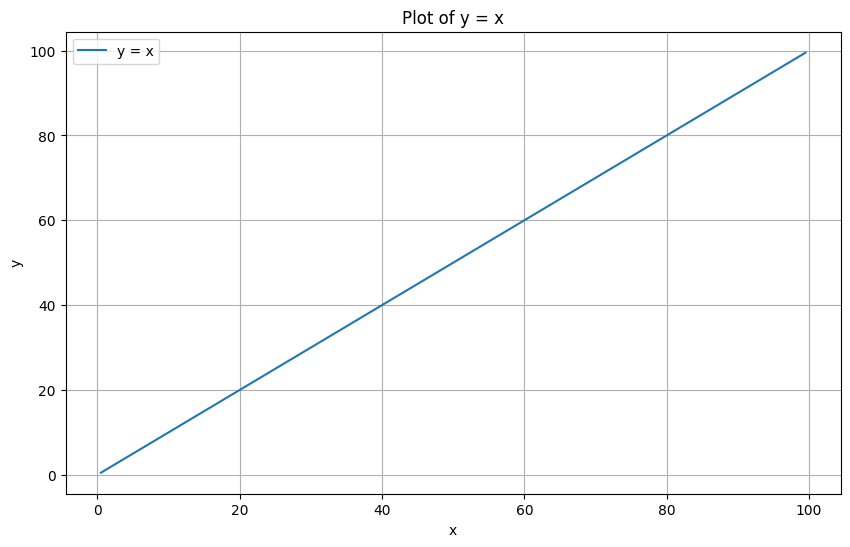

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the function y = x
y = x

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

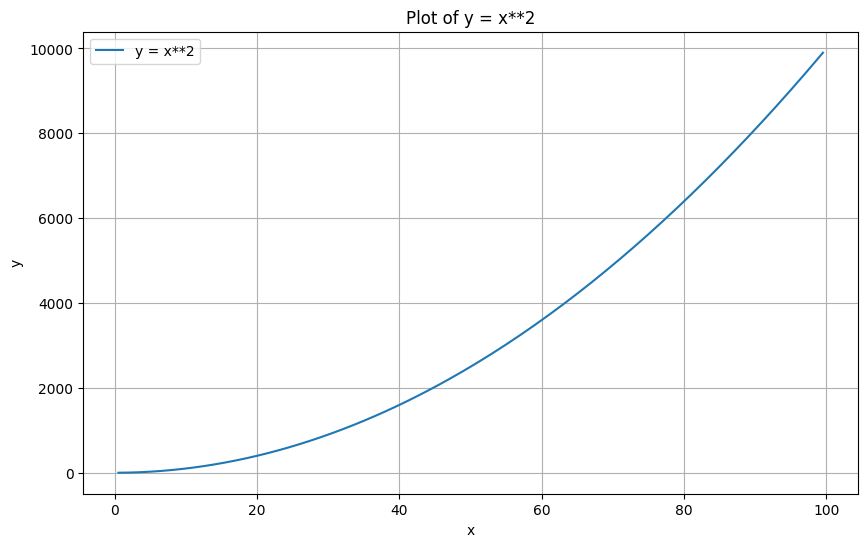

In [ ]:
# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the function y = x**2
y = x**2

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = x**2')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x**2')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

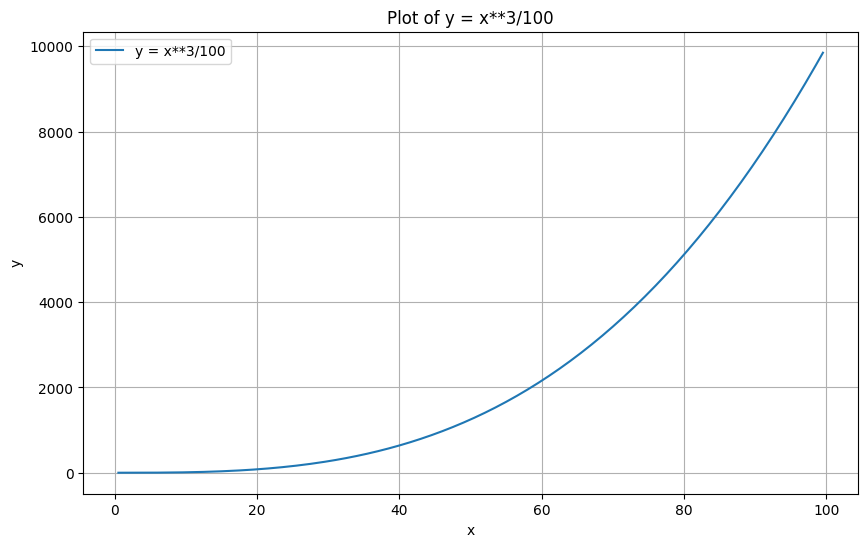

In [ ]:
# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the function y = x**3/100
y = (x**3)/100

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = x**3/100')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x**3/100')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

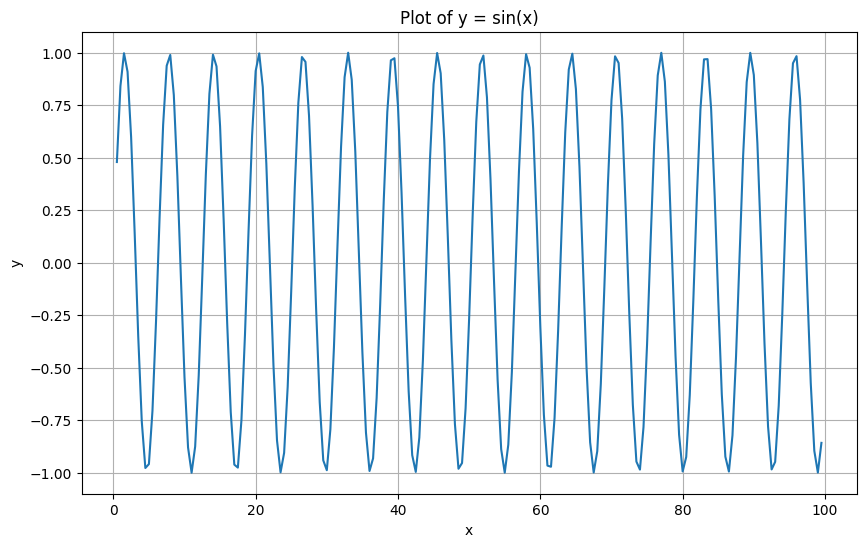

In [ ]:
# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the function y = sin(x)
y = np.sin(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = sin(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')

# Show the plot
plt.grid(True)
plt.show()

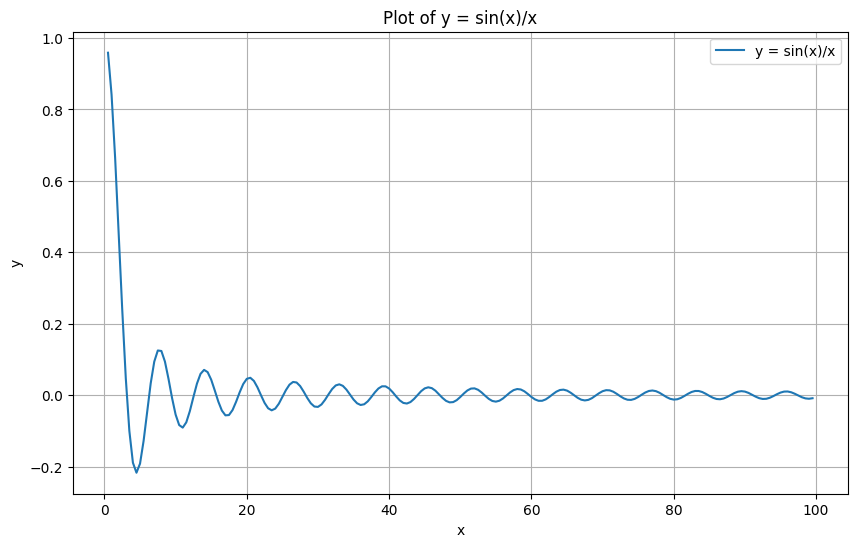

In [ ]:
# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the function y = sin(x)/x
y = np.sin(x)/x

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = sin(x)/x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

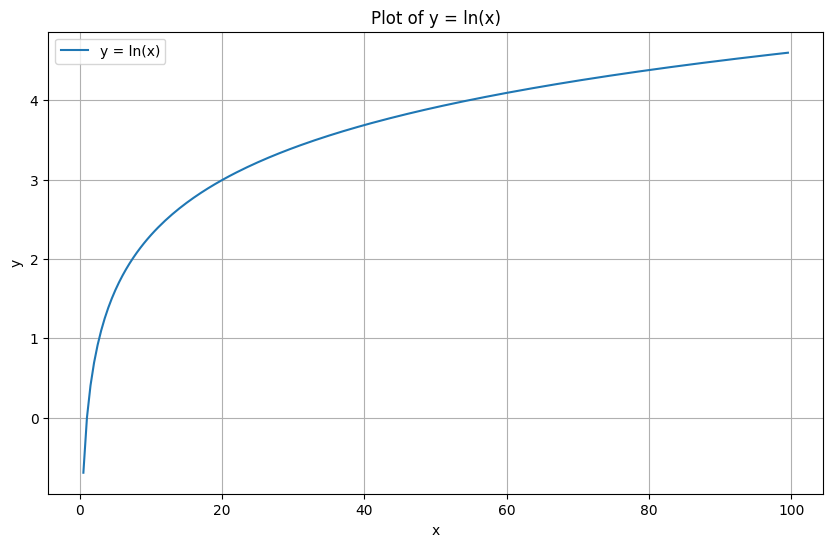

In [ ]:
# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the function y = ln(x)
y = np.log(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = ln(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = ln(x)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

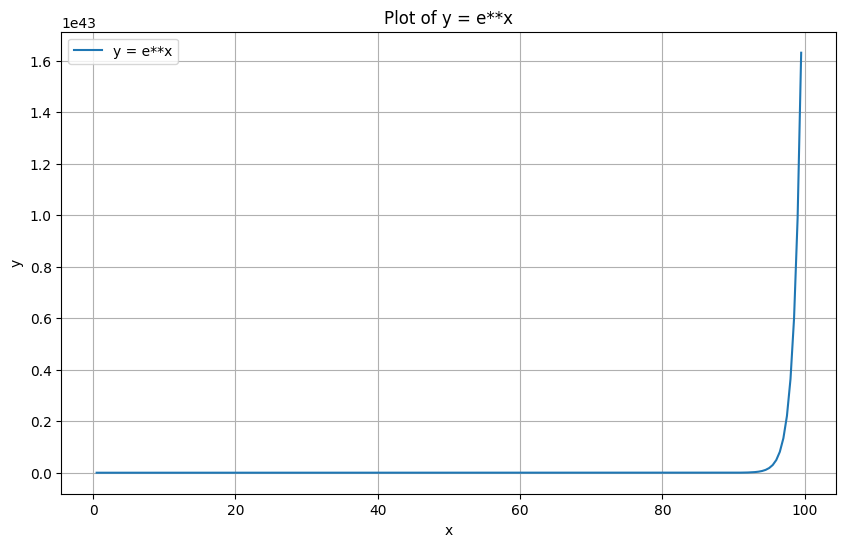

In [ ]:
# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the function y = e**x
e = 2.71828182846
y = e**x

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = e**x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e**x')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 containing random numbers drawn uniformly from the range of 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame out of this matrix and name the columns
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

df

,a,b,c,d,e
0,1.108368,1.778606,1.067936,1.654605,1.551619
1,1.368349,1.610049,1.738109,1.882144,1.704670
2,1.141432,1.934688,1.845727,1.789530,1.137298
3,1.040441,1.467782,1.347563,1.747464,1.793717
4,1.882465,1.776250,1.196013,1.834976,1.795089
5,1.621027,1.994025,1.591844,1.629683,1.837998
6,1.525853,1.489238,1.673824,1.433200,1.010804
7,1.341400,1.804035,1.370299,1.997580,1.817090
8,1.102517,1.264291,1.056950,1.012966,1.106630
9,1.699388,1.306143,1.453658,1.085516,1.966029


In [ ]:
# Find the column with the highest standard deviation
highest_std_dev_column = df.std().idxmax()

# Find the row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()

highest_std_dev_column, lowest_mean_row

('e', 8)

In [ ]:
# Add new column 'f' which is the sum of columns 'a', 'b', 'c', 'd', 'e'
df['f'] = df.sum(axis=1)

# Add new column 'g' based on the value of 'f'
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

df

,a,b,c,d,e,f,g
0,1.108368,1.778606,1.067936,1.654605,1.551619,7.161133,LT8
1,1.368349,1.610049,1.738109,1.882144,1.704670,8.303322,GT8
2,1.141432,1.934688,1.845727,1.789530,1.137298,7.848676,LT8
3,1.040441,1.467782,1.347563,1.747464,1.793717,7.396967,LT8
4,1.882465,1.776250,1.196013,1.834976,1.795089,8.484793,GT8
5,1.621027,1.994025,1.591844,1.629683,1.837998,8.674576,GT8
6,1.525853,1.489238,1.673824,1.433200,1.010804,7.132920,LT8
7,1.341400,1.804035,1.370299,1.997580,1.817090,8.330404,GT8
8,1.102517,1.264291,1.056950,1.012966,1.106630,5.543355,LT8
9,1.699388,1.306143,1.453658,1.085516,1.966029,7.510733,LT8


In [ ]:
# Find the number of rows where the value in column 'g' is 'LT8'
lt8_count = df[df['g'] == 'LT8'].shape[0]

# Find the standard deviation of the column 'f' for rows where the value in column 'g' is 'LT8'
std_dev_f_lt8 = df[df['g'] == 'LT8']['f'].std()

# Find the standard deviation of the column 'f' for rows where the value in column 'g' is 'GT8'
std_dev_f_gt8 = df[df['g'] == 'GT8']['f'].std()

lt8_count, std_dev_f_lt8, std_dev_f_gt8

(14, 0.6759052293668416, 0.1441386855086194)

# **Q12** Broadcasting in numpy

Broadcasting is a mechanism in NumPy that allows arrays of different shapes to be used together in arithmetic operations.

**Example 1:** Adding a scalar to an array
When you add a scalar to an array, NumPy broadcasts the scalar across the array. This means the scalar is added to each element of the array.
Array: [1, 2, 3]
Scalar: 5
Result: [6, 7, 8] (Each element in the array is increased by 5)

**Example 2:** Adding two arrays of different shapes
In this example, we have a 2x3 array (array2) and a 1x3 array (array3). NumPy broadcasts the 1x3 array across the 2x3 array along the first dimension.

In [ ]:
import numpy as np

# Example 1: Adding a scalar to an array
array1 = np.array([1, 2, 3])
scalar = 5
result1 = array1 + scalar
print("Example 1: Adding a scalar to an array")
print("Array:", array1)
print("Scalar:", scalar)
print("Result:", result1)

# Example 2: Adding two arrays of different shapes
array2 = np.array([[1, 2, 3], [4, 5, 6]])
array3 = np.array([10, 20, 30])
result2 = array2 + array3
print("\nExample 2: Adding two arrays of different shapes")
print("Array 2:", array2)
print("Array 3:", array3)
print("Result:", result2)

Example 1: Adding a scalar to an array
Array: [1 2 3]
Scalar: 5
Result: [6 7 8]

Example 2: Adding two arrays of different shapes
Array 2: [[1 2 3]
 [4 5 6]]
Array 3: [10 20 30]
Result: [[11 22 33]
 [14 25 36]]


In [ ]:
import numpy as np

def custom_argmin(array):
    min_index = 0
    min_value = array[0]
    for i in range(1, len(array)):
        if array[i] < min_value:
            min_value = array[i]
            min_index = i
    return min_index

# Example usage
array = np.array([5, 3, 6, 2, 8, 1, 4])

# Using custom function
custom_min_index = custom_argmin(array)
print("Custom argmin index:", custom_min_index)

# Using np.argmin for verification
numpy_min_index = np.argmin(array)
print("NumPy argmin index:", numpy_min_index)

Custom argmin index: 5
NumPy argmin index: 5
